## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of a galactic cluster.

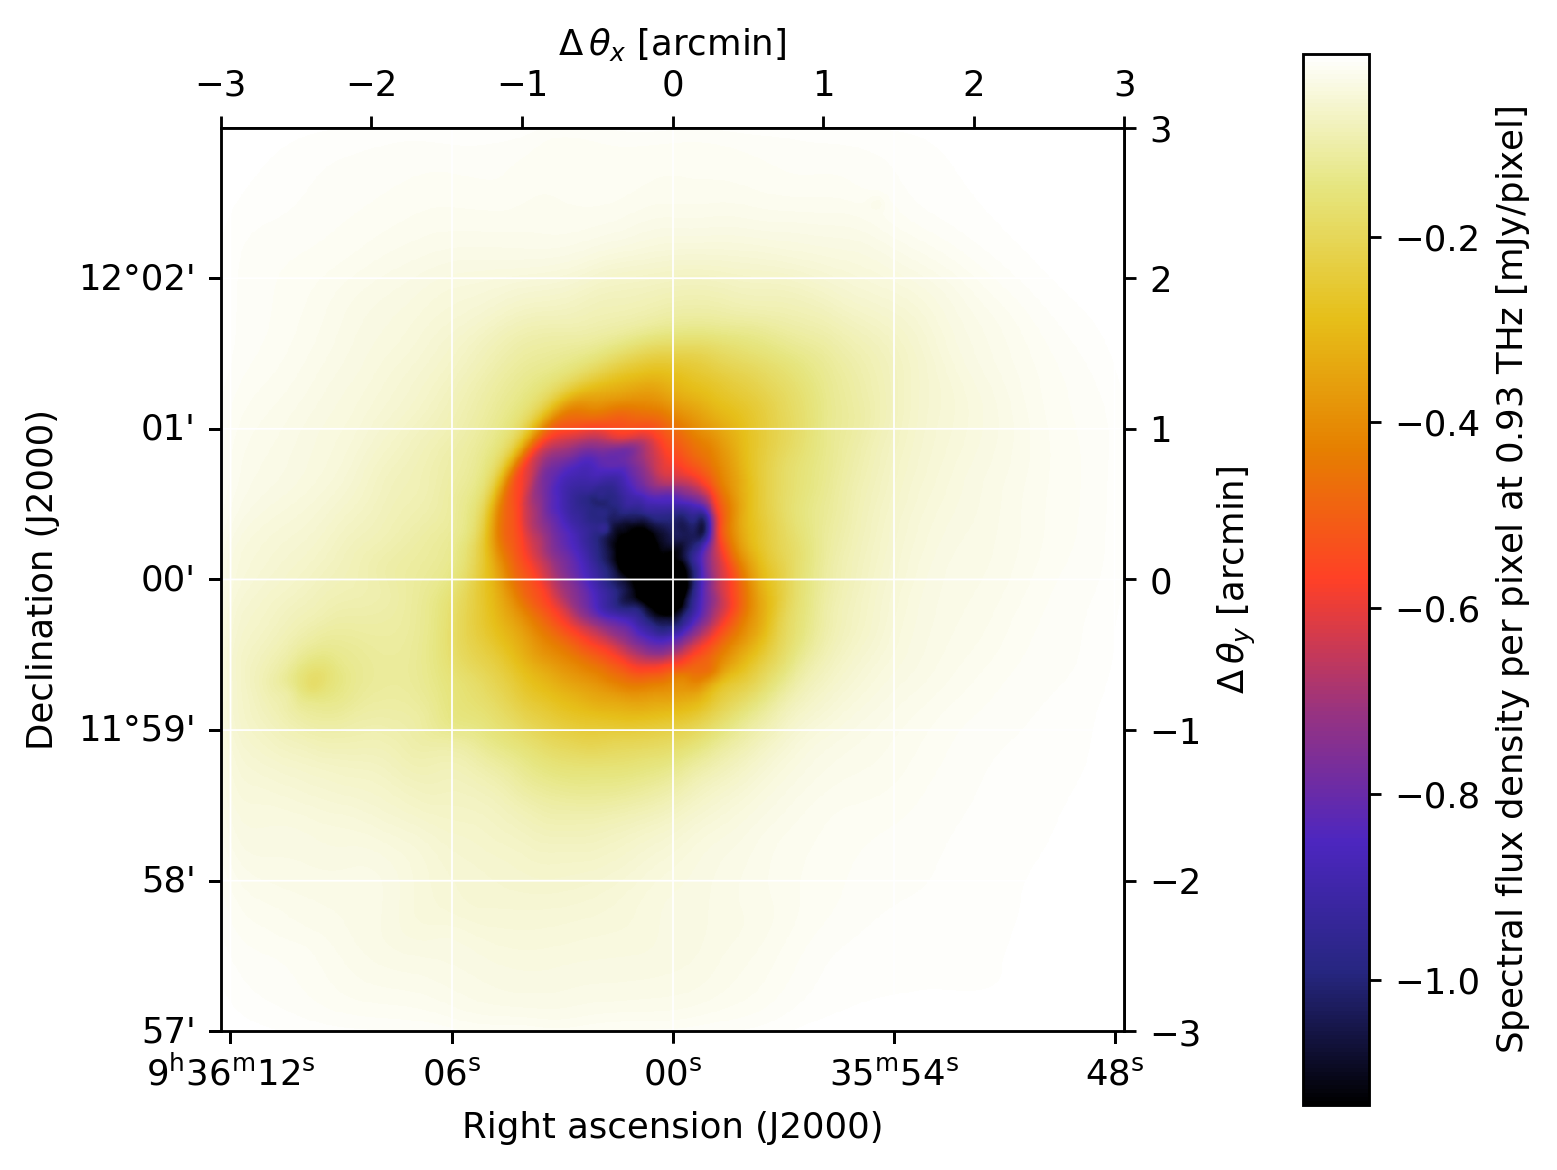

In [1]:
import maria

map_filename = maria.io.fetch("maps/small_cluster.h5")

input_map = maria.map.load(
    nu=930e9,
    filename=map_filename,  # filename
    width=6/60,  # width in degrees
    center=(144, 12),  # position in the sky
    frame="ra_dec",
    units="Jy/pixel",  # units of the input map
)

input_map.plot()

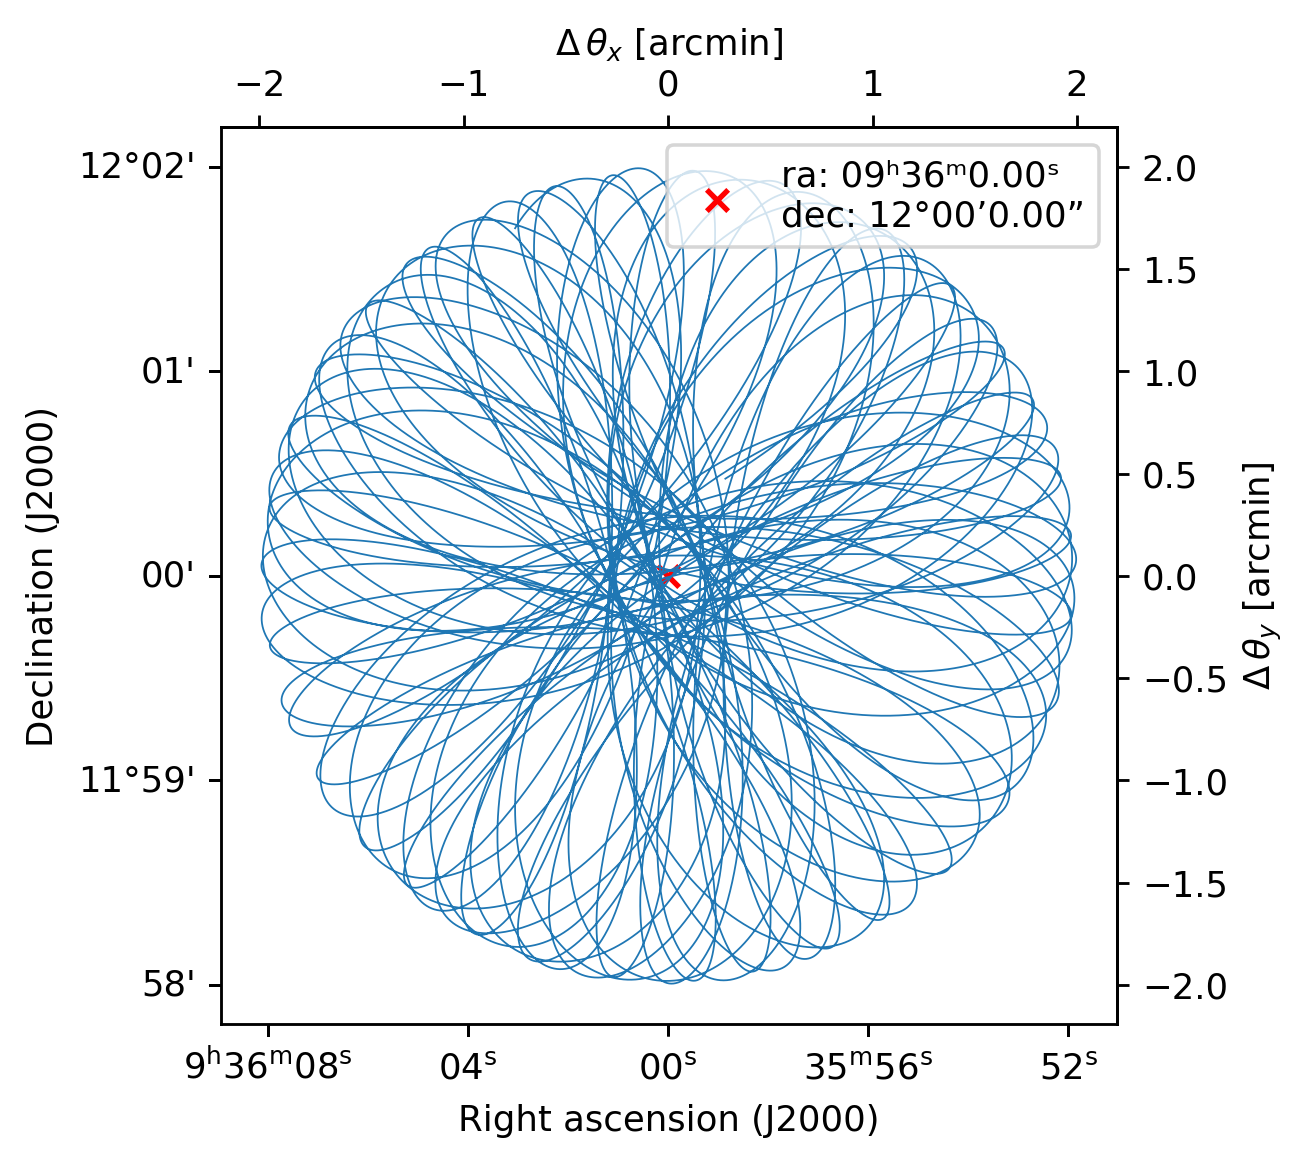

In [2]:

plan = maria.get_plan(
    scan_pattern="daisy",  # scanning pattern
    scan_options={"radius": 2/60, "speed": 0.5/60},  # in degrees
    duration=1200,  # integration time in seconds
    sample_rate=50,  # in Hz
    scan_center=(144, 12),  # position in the sky
    frame="ra_dec",
)

plan.plot()

Instrument(1 array)
├ arrays:
│            n         FOV baseline      bands
│  array1  217  4.2 arcmin      0 m  [m2/f093]
│ 
└ bands:
               center      width    η      NEP      NET_RJ     NET_CMB  \
   m2/f093  86.21 GHz  20.98 GHz  0.1  30 aW√s  1.142 mK√s  1.381 mK√s   
   
                    FWHM  
   m2/f093  9.133 arcsec  


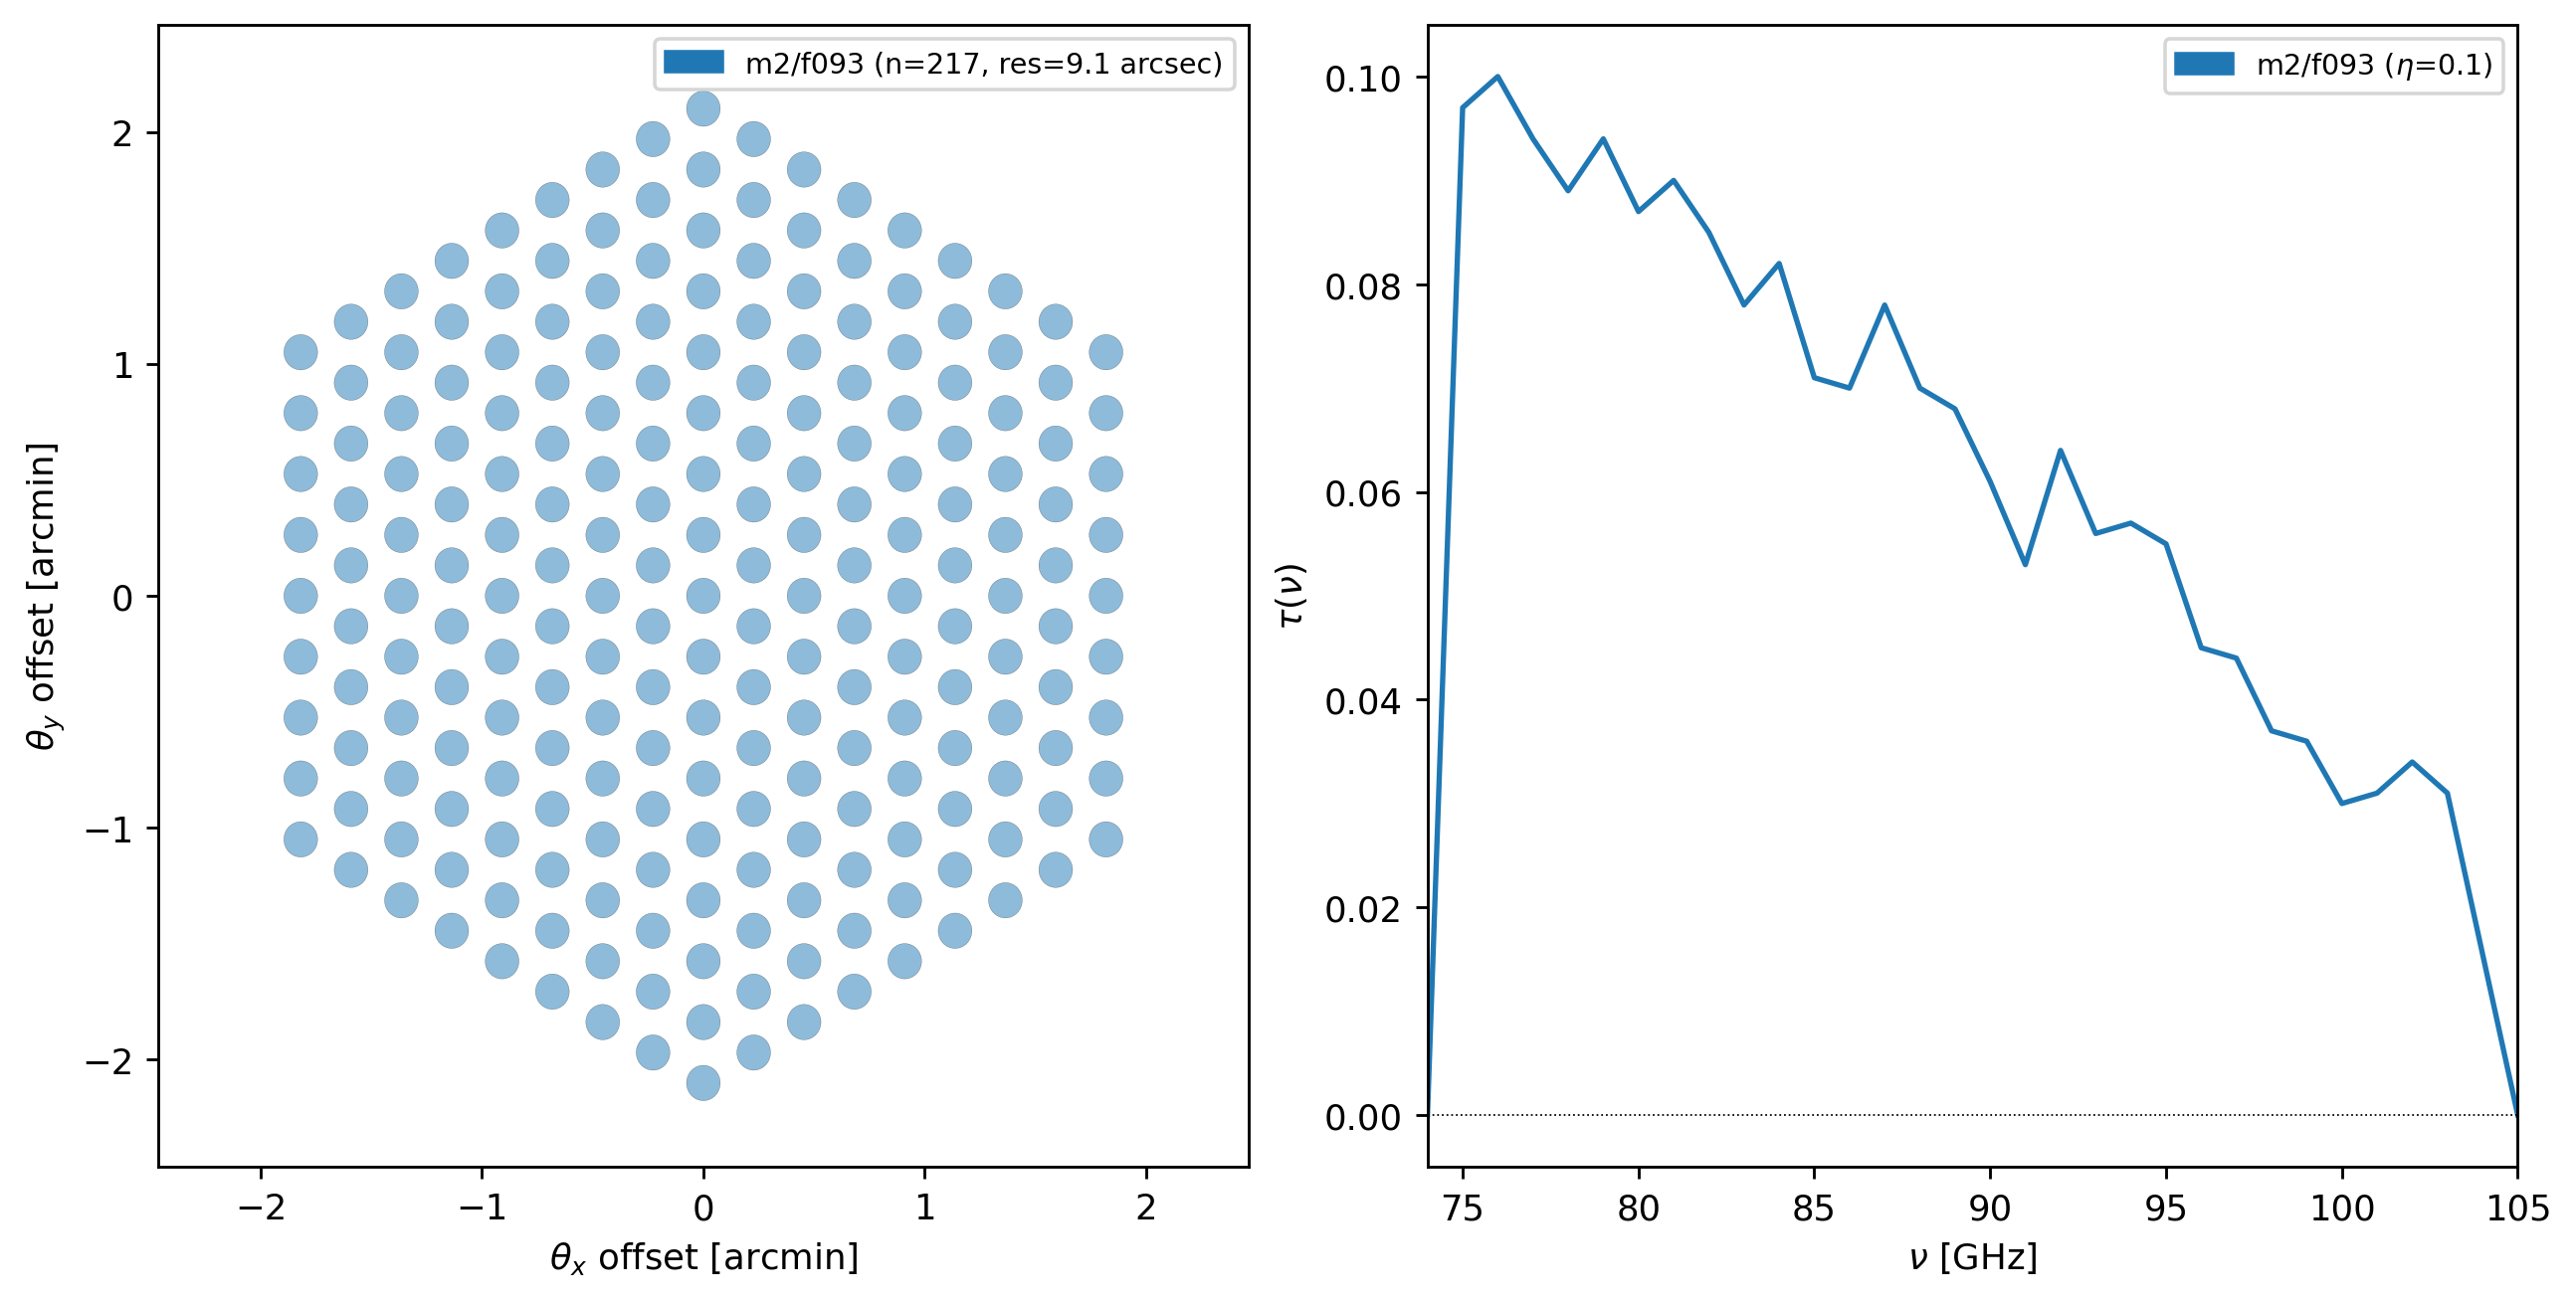

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

Constructing atmosphere:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing atmosphere:  17%|█▋        | 1/6 [00:01<00:06,  1.36s/it]

Constructing atmosphere:  33%|███▎      | 2/6 [00:02<00:05,  1.27s/it]

Constructing atmosphere:  50%|█████     | 3/6 [00:03<00:03,  1.19s/it]

Constructing atmosphere:  67%|██████▋   | 4/6 [00:04<00:02,  1.19s/it]

Constructing atmosphere:  83%|████████▎ | 5/6 [00:06<00:01,  1.22s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n         FOV baseline      bands
│ │  array1  217  4.2 arcmin      0 m  [m2/f093]
│ │ 
│ └ bands:
│                center      width    η      NEP      NET_RJ     NET_CMB  \
│    m2/f093  86.21 GHz  20.98 GHz  0.1  30 aW√s  1.142 mK√s  1.381 mK√s   
│    
│                     FWHM  
│    m2/f093  9.133 arcsec  
├ Site:
│   region: green_bank
│   location: 38°25’59.16”N 79°50’23.28”W
│   altitude: 0.825 km
│   seasonal: True
│   diurnal: True
├ Plan:
│   start_time: 2024-02-10 06:00:00.000 +00:00
│   duration: 1200 s
│   sample_rate: 50 Hz
│   center:
│     ra: 09ʰ36ᵐ0.00ˢ
│     dec: 12°00’0.00”
│   scan_pattern: daisy
│   scan_radius: 4 arcmin
│   scan_kwargs: {'radius': 0.03333333333333333, 'speed': 0.008333333333333333}
├ Atmosphere(6 processes with 6 layers):
│ ├ spectrum:
│ │   region: green_bank
│ └ weather:
│     region: green_bank
│     altitude: 0.825 km
│     time: Feb 10 01:09:59 -05:00
│     pwv[mean, rms]: (8.097

Generating turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Generating turbulence:  67%|██████▋   | 4/6 [00:00<00:00, 35.66it/s]

Generating turbulence: 100%|██████████| 6/6 [00:00<00:00, 30.26it/s]

Sampling turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Sampling turbulence:  17%|█▋        | 1/6 [00:00<00:01,  3.67it/s]

Sampling turbulence:  33%|███▎      | 2/6 [00:00<00:01,  3.76it/s]

Sampling turbulence:  50%|█████     | 3/6 [00:00<00:00,  3.80it/s]

Sampling turbulence:  67%|██████▋   | 4/6 [00:01<00:00,  3.27it/s]

Sampling turbulence:  83%|████████▎ | 5/6 [00:01<00:00,  3.46it/s]

Sampling turbulence: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

Sampling turbulence: 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map: 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, band=m2/f093]

Sampling map: 100%|██████████| 1/1 [00:03<00:00,  3.97s/it, band=m2/f093]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s, band=m2/f093]

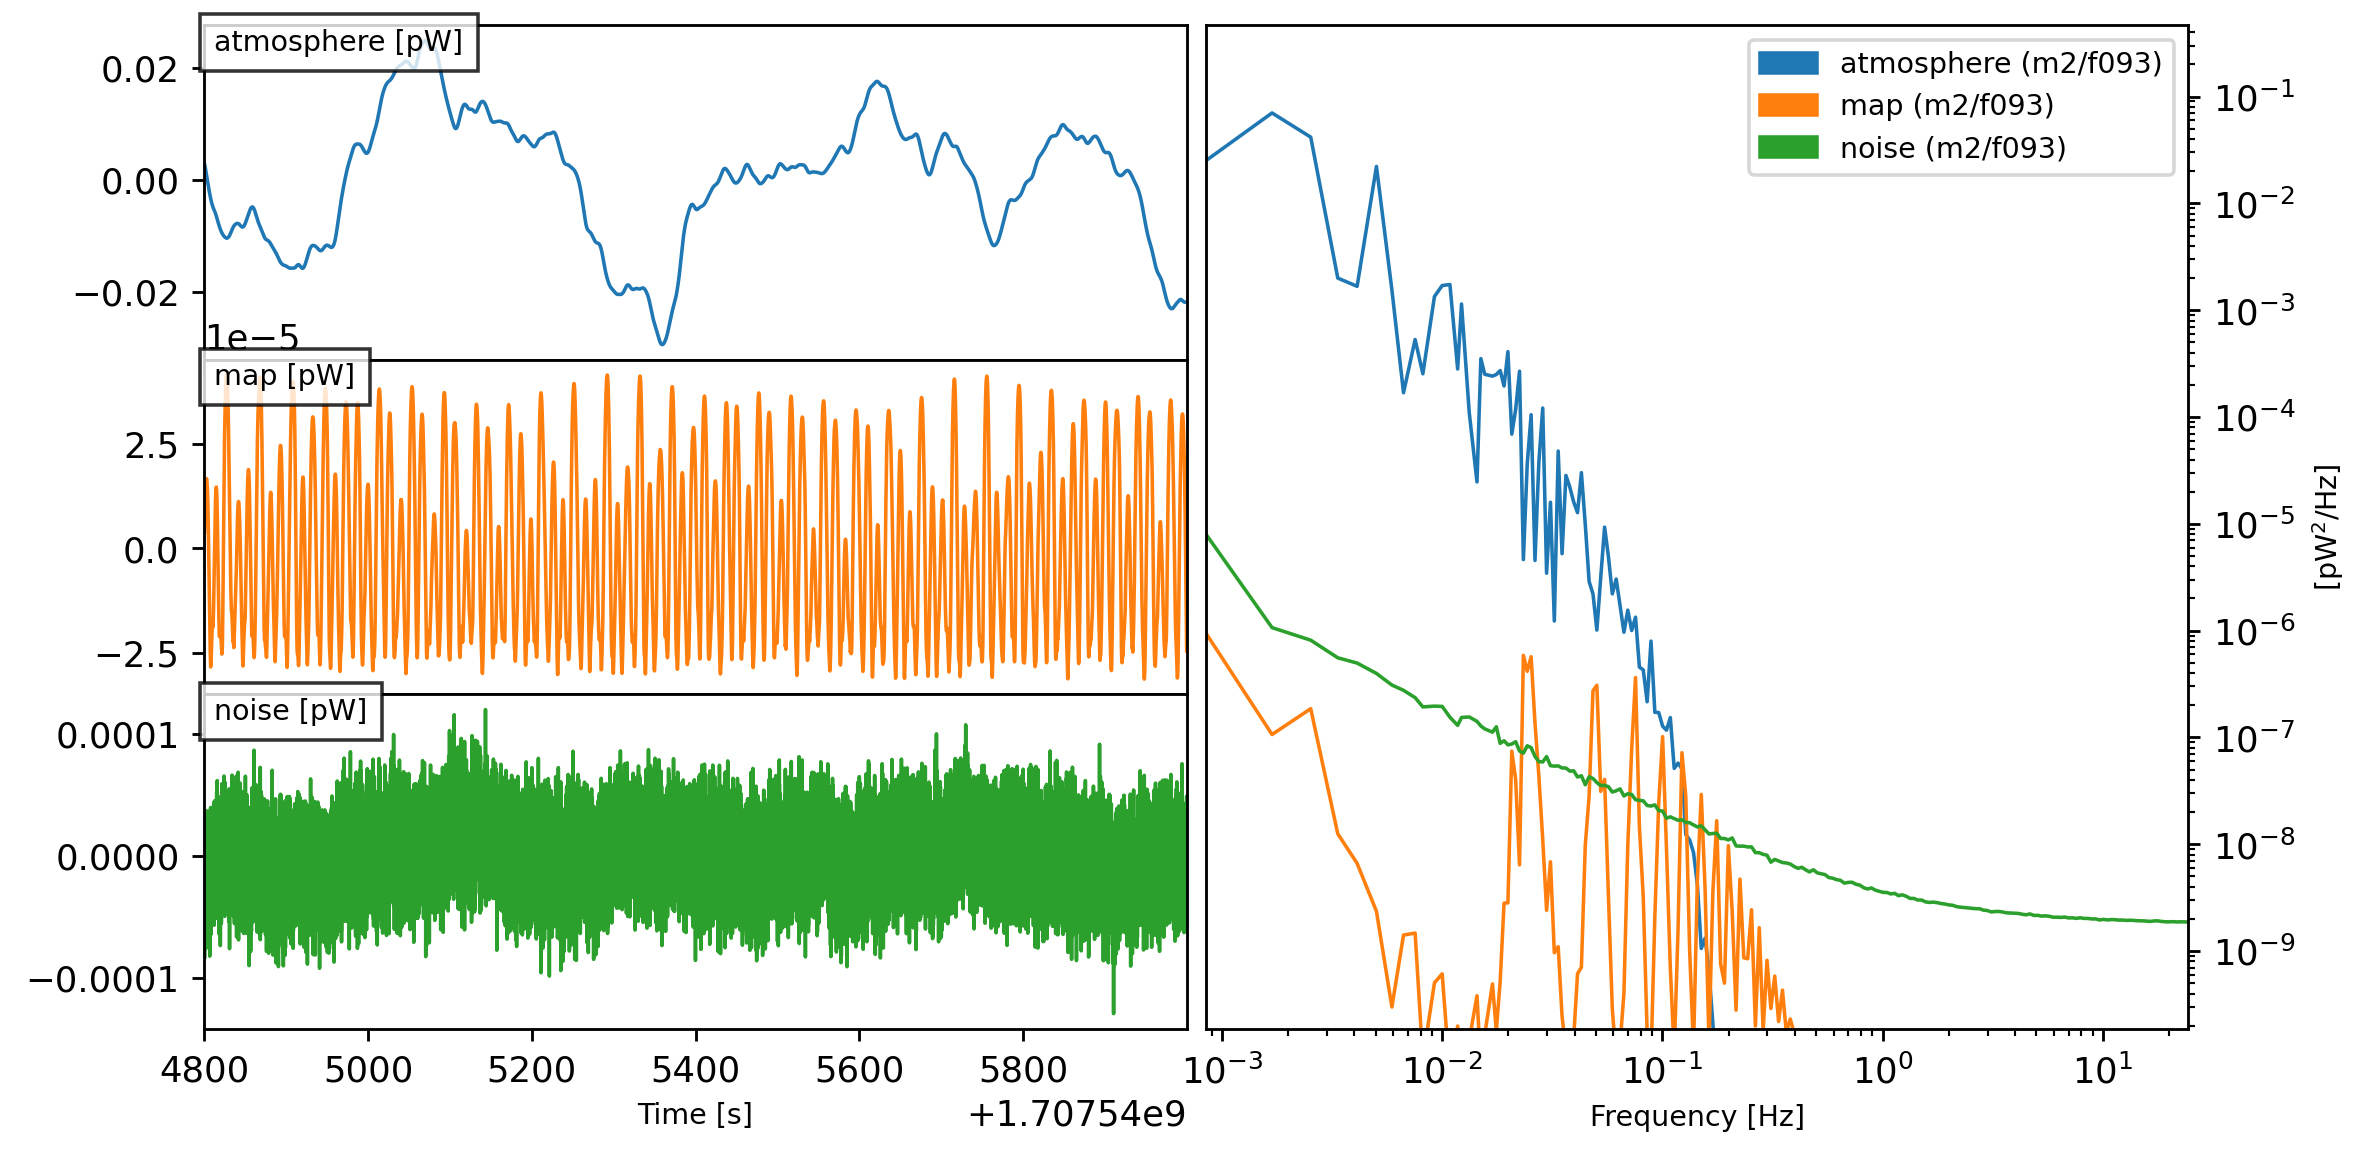

In [5]:
tod = sim.run()
tod.plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(144, 12),
    frame="ra_dec",
    width=6/60,
    height=6/60,
    resolution=0.03/60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tod)
output_map = mapper.run()

2025-04-22 16:17:45.387 INFO: Ran mapper for band m2/f093 in 12.73 s.


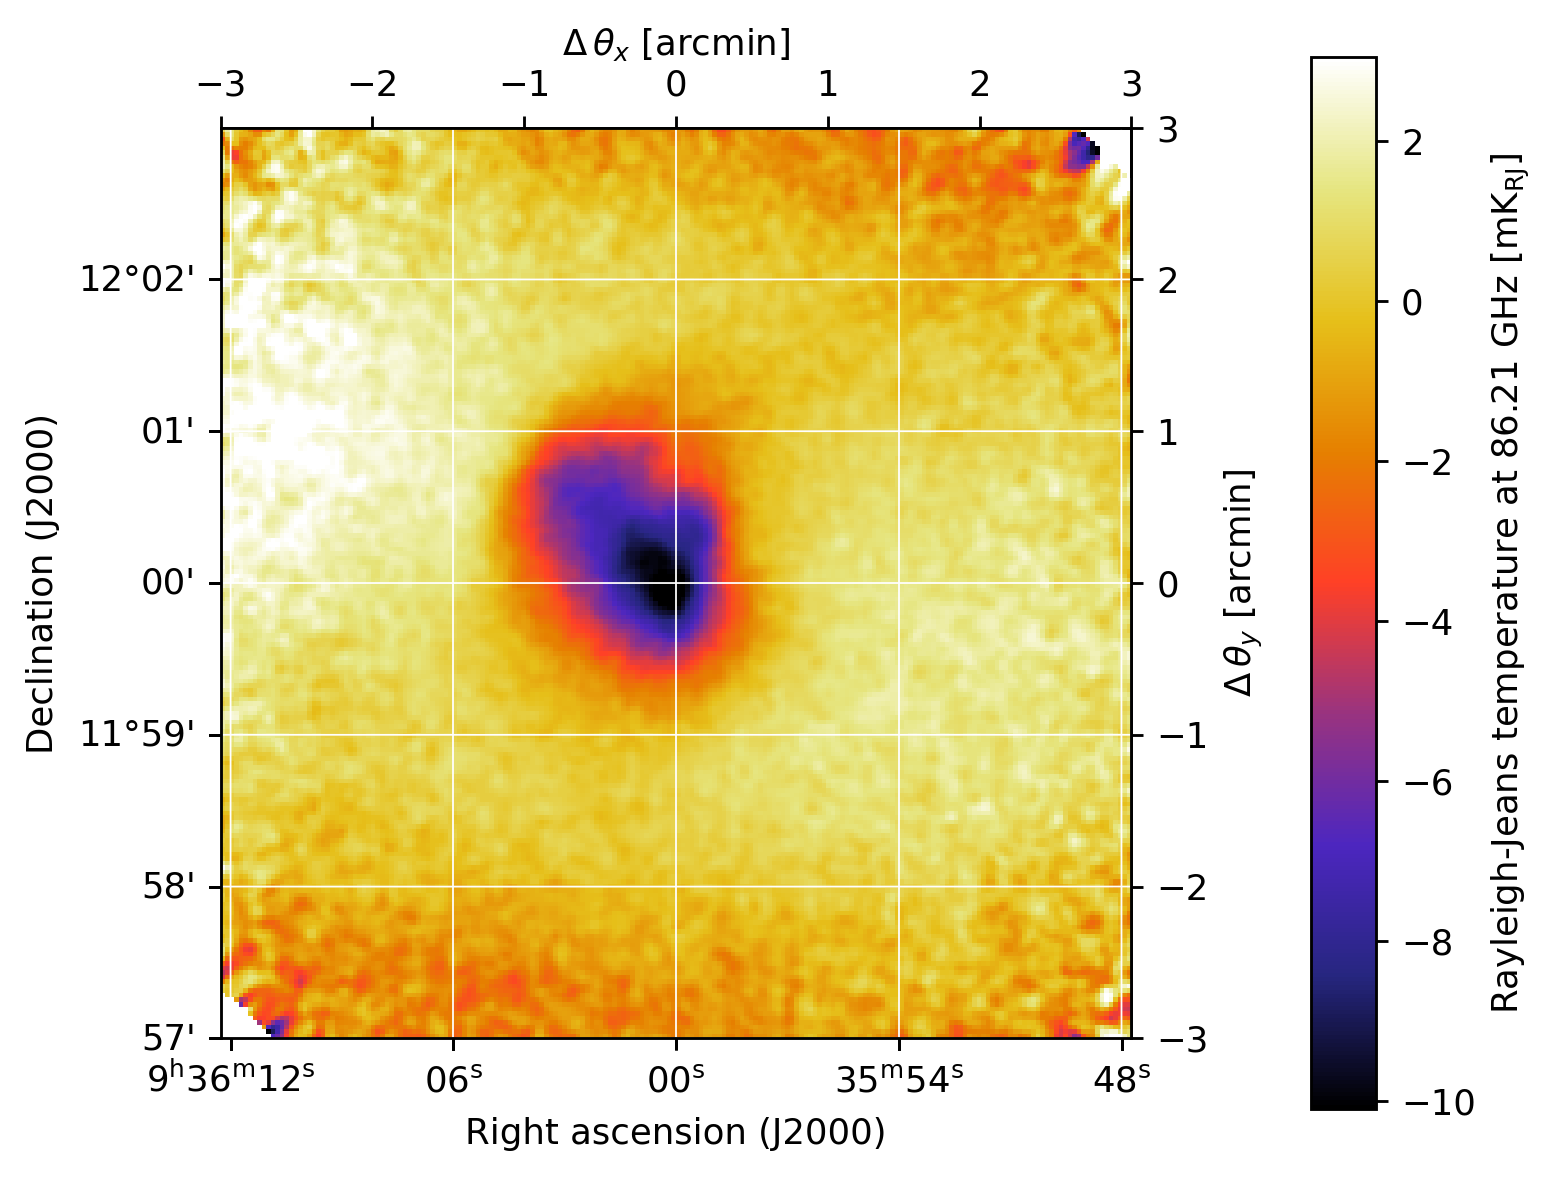

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")